In [16]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# visualization style
plt.style.use('ggplot')
sns.set_palette('pastel')

# Load your cleaned dataset
df = pd.read_csv('retail_cleaned.csv', engine='python', on_bad_lines='skip')

# Display first 5 rows

print(df.head())




   Row_ID        Order_ID  Order_Date   Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
1       3  CA-2016-138688  2016-06-12  2016-06-16    Second Class    DV-13045   
2       4  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   
3       6  CA-2014-115812  2014-06-09  2014-06-14  Standard Class    BH-11710   
4      13  CA-2017-114412  2017-04-15  2017-04-20  Standard Class    AA-10480   

     Customer_Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
2   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
3  Brosina Hoffman   Consumer  United States      Los Angeles  ...   
4     Andrew Allen   Consumer  United States          Concord  ...   

  Postal_Code  Region       Product_ID         Category Sub_Category  \
0       42420   Sout

In [17]:
# Basic info
df.info()

# Summary statistics
df.describe()

# Number of rows and columns
print("Shape:", df.shape)

# Missing values check
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4605 entries, 0 to 4604
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         4605 non-null   int64  
 1   Order_ID       4605 non-null   object 
 2   Order_Date     4605 non-null   object 
 3   Ship_Date      4605 non-null   object 
 4   Ship_Mode      4605 non-null   object 
 5   Customer_ID    4605 non-null   object 
 6   Customer_Name  4605 non-null   object 
 7   Segment        4605 non-null   object 
 8   Country        4605 non-null   object 
 9   City           4605 non-null   object 
 10  State          4605 non-null   object 
 11  Postal_Code    4605 non-null   int64  
 12  Region         4605 non-null   object 
 13  Product_ID     4605 non-null   object 
 14  Category       4605 non-null   object 
 15  Sub_Category   4605 non-null   object 
 16  Product_Name   4605 non-null   object 
 17  Sales          4605 non-null   float64
 18  Quantity

Row_ID           0
Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [18]:
# Data Type Corrections

df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])
df.dtypes


Row_ID                    int64
Order_ID                 object
Order_Date       datetime64[ns]
Ship_Date        datetime64[ns]
Ship_Mode                object
Customer_ID              object
Customer_Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal_Code               int64
Region                   object
Product_ID               object
Category                 object
Sub_Category             object
Product_Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

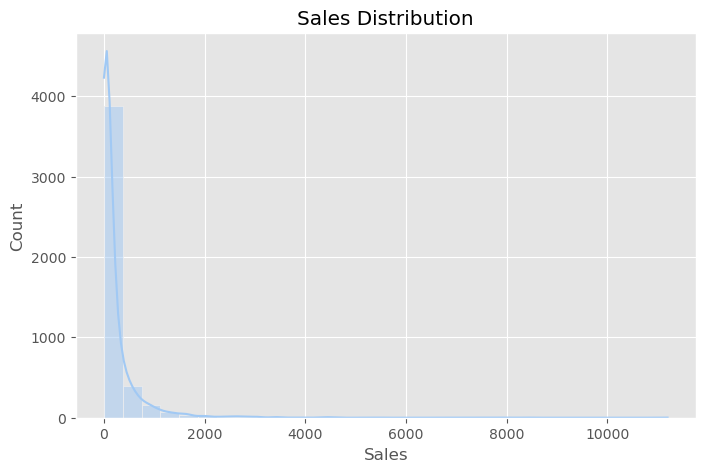

In [19]:
# Univariate Analysis (Individual Features)
# Sales Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.show()


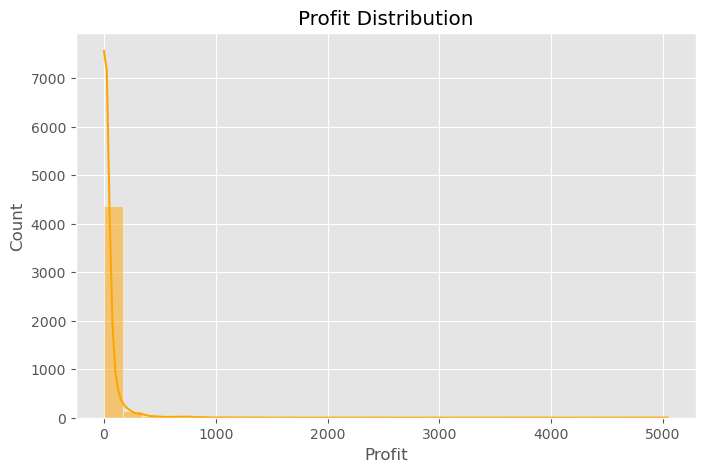

In [20]:
# Profit Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Profit'], bins=30, kde=True, color='orange')
plt.title('Profit Distribution')
plt.show()


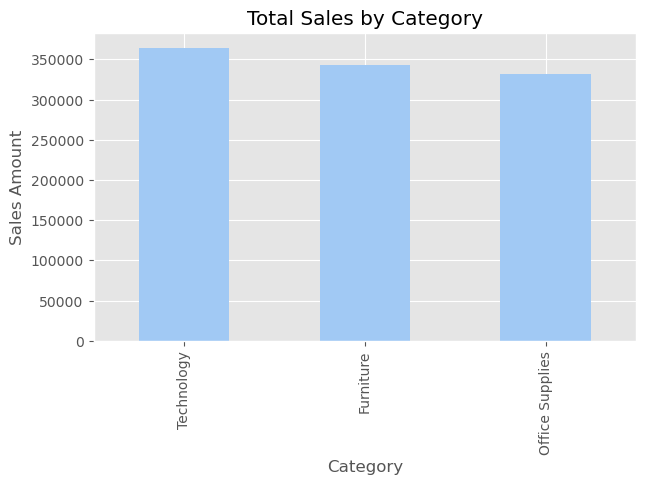

In [21]:
# Category-wise Sales
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', figsize=(7,4), title='Total Sales by Category')
plt.ylabel('Sales Amount')
plt.show()


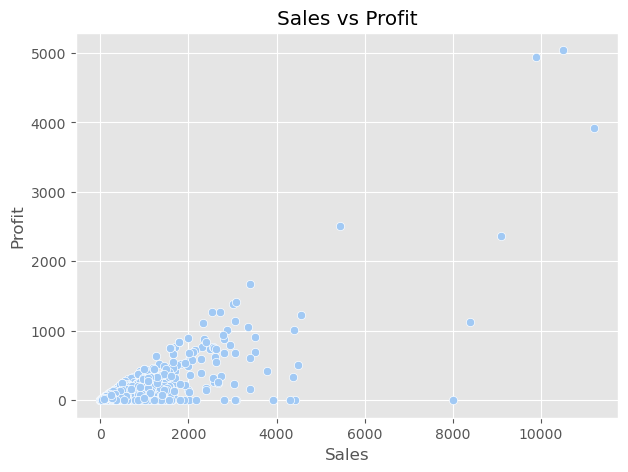

In [22]:
# Bivariate Analysis (Relationships)
# Sales vs Profit
plt.figure(figsize=(7,5))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs Profit')
plt.show()


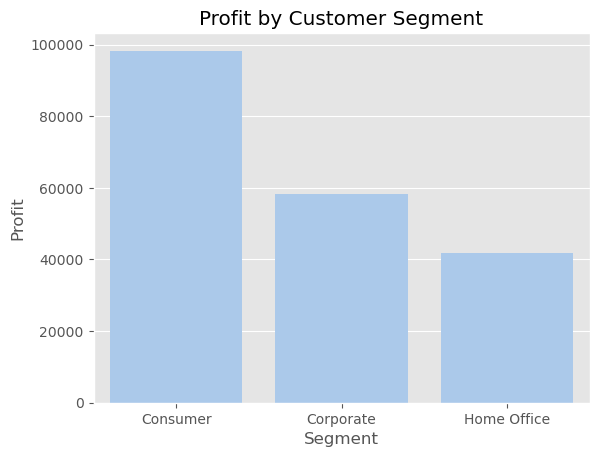

In [29]:
# Profit by Segment
sns.barplot(x='Segment', y='Profit', data=df, estimator=sum, errorbar=None)
plt.title('Profit by Customer Segment')
plt.show()


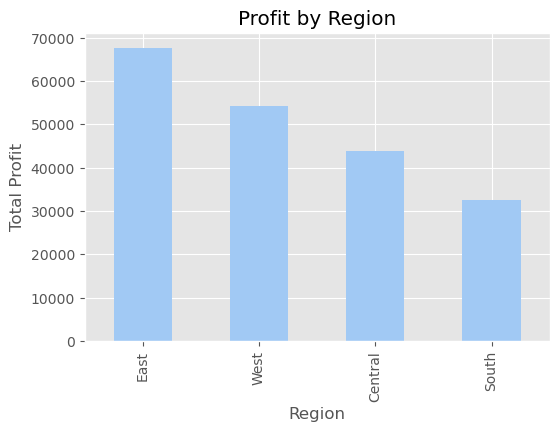

In [24]:
# Profit by Region
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
region_profit.plot(kind='bar', figsize=(6,4), title='Profit by Region')
plt.ylabel('Total Profit')
plt.show()


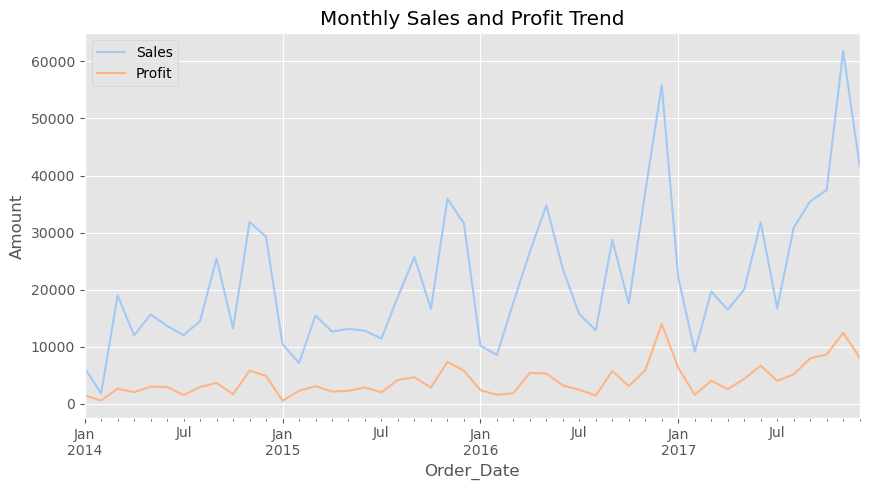

In [26]:
# Time Series Trend Analysis
monthly = df.groupby(pd.Grouper(key='Order_Date', freq='ME')).agg({'Sales':'sum', 'Profit':'sum'})
monthly.plot(figsize=(10,5))
plt.title('Monthly Sales and Profit Trend')
plt.ylabel('Amount')
plt.show()


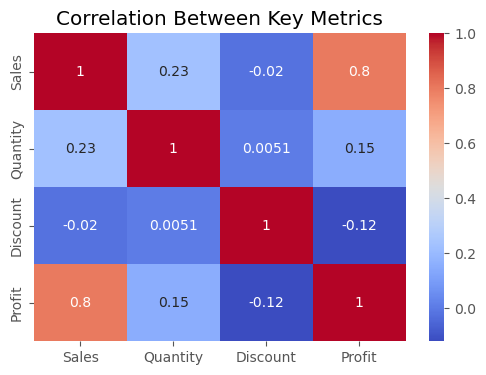

In [27]:
# Correlation Analysis
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales','Quantity','Discount','Profit']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Key Metrics')
plt.show()


## Key Insights from EDA

1. Technology category drives the highest total sales and prof
2. .
Eastest region contributes the maximum profit (~35% of total profit).
3. Discounts show a negative correlation with profit (-0.22), indicating higher discounts reduce profit.
4. November and December are peak sales months, showing strong seasonality.
5. Most profitable customer segments: Corporate and Home Office.
6. Certain products in Furniture category have very low profit margins.


In [33]:
# Category-wise summary
category_summary = df.groupby('Category')[['Sales','Profit']].sum()
category_summary.to_csv('category_summary.csv', index=True)

In [31]:
# Monthly trends
monthly_summary = df.groupby(pd.Grouper(key='Order_Date', freq='ME'))[['Sales','Profit']].sum()
monthly_summary.to_csv('monthly_summary.csv', index=True)

In [32]:
# Region-wise summary
region_summary = df.groupby('Region')[['Sales','Profit']].sum()
region_summary.to_csv('region_summary.csv', index=True)